# Topic Modelling

## Install & Import Library
Jika anda ingin menjalankan notebook secara offline seperti Jupyter Notebook, pastikan perangkat anda sudah terinstall library yang dibutuhkan. Jika anda ingin menjalankan notebook secara online seperti Google Colaboratory, pastikan notebook tersebut sudah terinstall library yang dibutuhkan. Library yang dibutuhkan dalam proyek ini, yaitu:
- Scrapy
- OS
- Regex
- Pandas
- NLTK
- Sklearn
- Sastrawi
- Wordcloud

In [1]:
# Import Library
import os
import regex as re
import pandas as pd
import nltk
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Install NLTK Corpus
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Crawling Data

## Create Scrapy Project

Pada bagian ini digunakan untuk membuat proyek library Scrapy dan memindah posisi direktori. Proyek library Scrapy diberi nama crawlproject. Posisi direktori dipindah ke crawlproject/crawlproject/spiders

In [2]:
# Membuat proyek library Scrapy
!scrapy startproject crawlproject

Error: scrapy.cfg already exists in d:\Kuliah\Semester 6\Penambangan dan Pencarian Web\jupyter-book\PPW\crawlproject


In [3]:
# Melihat posisi direktori saat ini
os.getcwd()

'd:\\Kuliah\\Semester 6\\Penambangan dan Pencarian Web\\jupyter-book\\PPW'

In [4]:
# Mengubah posisi direktori saat ini ke crawlproject/crawlproject/spiders
# Fungsinya agar bisa menjalankan file proyek library Scrapy
os.chdir('crawlproject/crawlproject/spiders')
os.getcwd()

'd:\\Kuliah\\Semester 6\\Penambangan dan Pencarian Web\\jupyter-book\\PPW\\crawlproject\\crawlproject\\spiders'

## Crawling Link PTA

Pada bagian ini digunakan untuk membuat dan menjalankan program python. Program tersebut digunakan untuk melakukan _crawling_ 40 link tugas akhir teknik informatika. Untuk melakukan _crawling_ menggunakan library scrapy.

In [5]:
%%writefile -a link.py
# Membuat file link.py
# File link.py digunakan untuk crawling link tugas akhir
import scrapy

class QuotesSpider(scrapy.Spider):
    name = "quotes"

    def start_requests(self):
        start_urls = ['https://pta.trunojoyo.ac.id/c_search/byprod/10/1']
        for i in range (2,9):
            tambah = 'https://pta.trunojoyo.ac.id/c_search/byprod/10/'+ str(i)
            start_urls.append(tambah)
        for url in start_urls:
            yield scrapy.Request(url=url, callback=self.parse)

    def parse(self, response):
        for i in range(1, 6):
            yield {
                'link':response.css('#content_journal > ul > li:nth-child(' +str(i)+ ') > div:nth-child(3) > a::attr(href)').extract()
            }

Appending to link.py


In [6]:
# Menjalankan file link.py untuk melakukan proses crawling link tugas akhir
# Hasil akan disimpan dalam file link.csv
# File link.csv digunakan untuk melakukan crawling detail tugas akhir
!scrapy runspider link.py -o link.csv

C:\Python310\lib\site-packages\scrapy\spiderloader.py:37: UserWarning: There are several spiders with the same name:

  QuotesSpider named 'quotes' (in crawlproject.spiders.detail)

  QuotesSpider named 'quotes' (in crawlproject.spiders.link)

  This can cause unexpected behavior.
  warnings.warn(
2022-06-29 22:17:47 [scrapy.utils.log] INFO: Scrapy 2.6.1 started (bot: crawlproject)
2022-06-29 22:17:47 [scrapy.utils.log] INFO: Versions: lxml 4.8.0.0, libxml2 2.9.12, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 22.2.0, Python 3.10.1 (tags/v3.10.1:2cd268a, Dec  6 2021, 19:10:37) [MSC v.1929 64 bit (AMD64)], pyOpenSSL 22.0.0 (OpenSSL 1.1.1m  14 Dec 2021), cryptography 36.0.1, Platform Windows-10-10.0.19044-SP0
2022-06-29 22:17:47 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'crawlproject',
 'NEWSPIDER_MODULE': 'crawlproject.spiders',
 'ROBOTSTXT_OBEY': True,
 'SPIDER_LOADER_WARN_ONLY': True,
 'SPIDER_MODULES': ['crawlproject.spiders']}
2022-06-29 22:17:47 [scrapy.utils.

## Crawling Detail PTA

Pada bagian ini digunakan untuk membuat dan menjalankan program python. Program tersebut digunakan untuk melakukan crawling 40 detail tugas akhir informatika. Untuk melakukan crawling menggunakan library scrapy.

In [7]:
%%writefile -a detail.py
# Membuat file detail.py
# File detail.py digunakan untuk crawling detail tugas akhir
import scrapy
import pandas as pd

class QuotesSpider(scrapy.Spider):
    name = "quotes"

    def start_requests(self):
        dataCSV = pd.read_csv('link.csv')
        indexData = dataCSV.iloc[:, [0]].values
        arrayData = []
        for i in indexData:
            ambil = i[0]
            arrayData.append(ambil)
        for url in arrayData:
            yield scrapy.Request(url=url, callback=self.parse)

    def parse(self, response):
        yield {
            'judul': response.css('#content_journal > ul > li > div:nth-child(2) > a::text').extract(),
            'penulis': response.css('#content_journal > ul > li > div:nth-child(2) > div:nth-child(2) > span::text').extract(),
            'pembimbing_1': response.css('#content_journal > ul > li > div:nth-child(2) > div:nth-child(3) > span::text').extract(),
            'pembimbing_2': response.css('#content_journal > ul > li > div:nth-child(2) > div:nth-child(4) > span::text').extract(),
            'abstrak': response.css('#content_journal > ul > li > div:nth-child(4) > div:nth-child(2) > p::text').extract()
        }

Appending to detail.py


In [8]:
# Menjalankan file detail.py untuk melakukan proses crawling detail tugas akhir
# Hasil akan disimpan dalam file detail.csv
# File detail.csv digunakan sebagai dataset utama yang diolah dalam proyek ini
!scrapy runspider detail.py -o detail.csv

C:\Python310\lib\site-packages\scrapy\spiderloader.py:37: UserWarning: There are several spiders with the same name:

  QuotesSpider named 'quotes' (in crawlproject.spiders.detail)

  QuotesSpider named 'quotes' (in crawlproject.spiders.link)

  This can cause unexpected behavior.
  warnings.warn(
2022-06-29 22:17:51 [scrapy.utils.log] INFO: Scrapy 2.6.1 started (bot: crawlproject)
2022-06-29 22:17:51 [scrapy.utils.log] INFO: Versions: lxml 4.8.0.0, libxml2 2.9.12, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 22.2.0, Python 3.10.1 (tags/v3.10.1:2cd268a, Dec  6 2021, 19:10:37) [MSC v.1929 64 bit (AMD64)], pyOpenSSL 22.0.0 (OpenSSL 1.1.1m  14 Dec 2021), cryptography 36.0.1, Platform Windows-10-10.0.19044-SP0
2022-06-29 22:17:51 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'crawlproject',
 'NEWSPIDER_MODULE': 'crawlproject.spiders',
 'ROBOTSTXT_OBEY': True,
 'SPIDER_LOADER_WARN_ONLY': True,
 'SPIDER_MODULES': ['crawlproject.spiders']}
2022-06-29 22:17:51 [scrapy.utils.

# Preprocessing Data

## Read Dataset

Pada bagian ini digunakan untuk membaca dataset. Dataset akan dibaca dan diubah menjadi dataframe agar lebih mudah diolah. Hanya kolom abstrak yang diambil untuk diolah.

In [9]:
# Membaca dataset dan hanya mengambil kolom
docs = pd.read_csv('detail.csv', usecols=['abstrak'])

## Cleaning & Tokenizing
Pada bagian ini digunakan untuk membersihkan dan melakukan tokenisasi data yang sudah dicrawling. Fungsi dari membersihkan data adalah membuang tanda baca dan membuatnya menjadi _lowercase_. Kemudian dilakukan tokenisasi untuk memecah kata.

In [10]:
# Membersihkan dan melakukan tokenisasi data yang sudah dicrawling
docs['abstrak'] = docs['abstrak'].apply(
    lambda x: word_tokenize(re.sub('[^a-zA-Z]', ' ', str(x).lower())))
docs['abstrak']

0     [sistem, informasi, akademik, siakad, merupaka...
1     [setiap, perusahaan, mengharapkan, adanya, hub...
2     [berjalannya, koneksi, jaringan, komputer, den...
3     [penggunaan, teknologi, mobile, saat, ini, san...
4     [penjadwalan, kuliah, di, perguruan, tinggi, m...
                            ...                        
76    [aplikasi, klasifikasi, status, gizi, balita, ...
77    [perkembangan, game, yang, semakin, pesat, mem...
78    [teknologi, mobile, game, beroperating, system...
79    [sistem, pengenalan, wajah, adalah, suatu, sis...
80    [kantor, badan, kepegawaian, kota, bangkalan, ...
Name: abstrak, Length: 81, dtype: object

## Stopwords
Pada bagian ini digunakan untuk menghapus kata-kata yang termasuk _stopword_. Kata-kata yang termasuk _stopword_ tidak mengandung arti spesifik sehingga harus dihapus sebelum diolah. Di dalam proyek ini akan dilakukan penghapusan kata-kata bahasa indonesia dan inggris yang termasuk _stopword_.

### Stopwords Dictionary
<a href="https://gist.github.com/sebleier/554280" title="NLTK's list of english stopwords">Kamus Stopword Bahasa Inggris</a>

<a href="https://github.com/stopwords-iso/stopwords-id/blob/master/raw/indonesian-stopwords-complete.txt" title="indonesian-stopwords-complete.txt">Kamus Stopword Bahasa Indonesia</a>

In [11]:
# Menghapus kata-kata bahasa indonesia dan inggris yang termasuk stopword
stopwords_dictionary = stopwords.words('indonesian')
docs['abstrak_no_sw'] = docs['abstrak'].apply(
    lambda doc: [d for d in doc if d not in stopwords_dictionary])
docs['abstrak_no_sw']

0     [sistem, informasi, akademik, siakad, sistem, ...
1     [perusahaan, mengharapkan, hubungan, pelanggan...
2     [berjalannya, koneksi, jaringan, komputer, lan...
3     [penggunaan, teknologi, mobile, marak, disampi...
4     [penjadwalan, kuliah, perguruan, kompleks, per...
                            ...                        
76    [aplikasi, klasifikasi, status, gizi, balita, ...
77    [perkembangan, game, pesat, alternative, pemin...
78    [teknologi, mobile, game, beroperating, system...
79    [sistem, pengenalan, wajah, sistem, mengenali,...
80    [kantor, badan, kepegawaian, kota, bangkalan, ...
Name: abstrak_no_sw, Length: 81, dtype: object

## Stemming
Pada bagian ini digunakan untuk stemming. Stemming adalah sebuah metode yang digunakan untuk mengubah sebuah kata menjadi bentuk dasar dari kata tersebut, misalnya:

- Bekerja menjadi kerja
- Memakan menjadi makan
- Tulisan menjadi tulis

### Stemming Dictionary
<a href="https://github.com/har07/PySastrawi/blob/master/src/Sastrawi/Stemmer/data/kata-dasar.txt" title="kata-dasar.txt">Kamus Stemming Bahasa Indonesia</a>

In [12]:
# Mengubah sebuah kata menjadi bentuk dasar dari kata tersebut
term_dict = {}
factory = StemmerFactory()
stemmer = factory.create_stemmer()

for doc in docs['abstrak_no_sw']:
    for term in doc:
        if term not in term_dict:
            term_dict[term] = ' '

for term in term_dict:
    term_dict[term] = stemmer.stem(term)

docs['abstrak_no_sw_stemmed'] = docs['abstrak_no_sw'].apply(
    lambda doc: [term_dict[term] for term in doc])
docs['deskripsi'] = docs['abstrak_no_sw_stemmed'].apply(lambda doc: " ".join([x for x in doc]))
docs['deskripsi']

0     sistem informasi akademik siakad sistem inform...
1     usaha harap hubung langgan pt x usaha gerak bi...
2     jalan koneksi jaring komputer lancar ganggu ha...
3     guna teknologi mobile marak samping unggul mud...
4     jadwal kuliah guru kompleks masalah variabel t...
                            ...                        
76    aplikasi klasifikasi status gizi balita mudah ...
77    kembang game pesat alternative minat bentuk ga...
78    teknologi mobile game beroperating system open...
79    sistem kenal wajah sistem nali identitas wajah...
80    kantor badan pegawai kota bangkal instansi per...
Name: deskripsi, Length: 81, dtype: object

## Term Frequency - Inverse Document Frequency

Pada bagian ini digunakan untuk mengetahui nilai TF-IDF. TF-IDF adalah ukuran statistik yang menggambarkan pentingnya suatu term terhadap sebuah dokumen dalam sebuah korpus. 

Rumus Term Frequency:

$$
tf(t,d) = { f_{ t,d } \over \sum_{t' \in d } f_{t,d}}
$$

$ f_{ t,d } \quad\quad\quad\quad\quad$: Jumlah kata t muncul dalam dokumen

$ \sum_{t' \in d } f_{t,d} \quad\quad$: Jumlah seluruh kata yang ada dalam dokumen

Rumus Inverse Document Frequency:

$$
idf( t,D ) = log { N \over { | \{ d \in D:t \in d \} | } }
$$

$ N \quad\quad\quad\quad\quad\quad$ : Jumlah seluruh dokumen

$ | \{ d \in D:t \in d \} | $ : Jumlah dokumen yang mengandung kata $ t $

Rumus Term Frequency - Inverse Document Frequency:

$$
tfidf( t,d,D ) = tf( t,d ) \times idf( t,D )
$$

In [13]:
# Proses Term Frequency - Inverse Document Frequency
vect = TfidfVectorizer()
vect_text = vect.fit_transform(docs['deskripsi'])
attr_count = vect.get_feature_names_out().shape[0]
print(f'Jumlah term dalam kumpulan dokumen : {attr_count}')

Jumlah term dalam kumpulan dokumen : 1072


In [14]:
# Menyimpan hasil TF-IDF ke dalam DataFrame
tfidf = pd.DataFrame(
    data=vect_text.toarray(),
    columns=vect.get_feature_names_out()
)
tfidf.head()

,abstract,abstrak,abu,acu,ada,adm,admin,administrasi,administrator,adu,...,watershed,web,website,wide,wilayah,window,winnowing,world,www,yogyakarta
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.306983,0.051164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Menampilkan 5 kata paling sering muncul
idf = vect.idf_
dd = dict(zip(vect.get_feature_names_out(), idf))
l = sorted(dd, key = dd.get)
print("5 Kata paling sering muncul:")
for i, word in enumerate(l[:5]):
    print(f"{i+1}. {word}\t(Nilai idf: {dd[word]})")

5 Kata paling sering muncul:
1. hasil	(Nilai idf: 1.202026627873287)
2. kunci	(Nilai idf: 1.3291818033585336)
3. metode	(Nilai idf: 1.363667979429703)
4. sistem	(Nilai idf: 1.5148989491536264)
5. proses	(Nilai idf: 1.5565716455541945)


In [16]:
# Menampilkan 5 kata paling jarang muncul
print("5 Kata paling jarang muncul:")
for i, word in enumerate(l[:-5:-1]):
    print(f"{i+1}. {word}\t(Nilai idf: {dd[word]})")

5 Kata paling jarang muncul:
1. yogyakarta	(Nilai idf: 4.308106958596143)
2. www	(Nilai idf: 4.308106958596143)
3. world	(Nilai idf: 4.308106958596143)
4. winnowing	(Nilai idf: 4.308106958596143)


## TOPIC MODELLING
### Latent Semantic Analysis(LSA)

Latent Semantic Analysis (LSA) merupakan sebuah metode yang memanfaatkan model statistik matematis untuk menganalisa struktur semantik suatu teks. LSA bisa digunakan untuk menilai abstrak tugas akhir dengan mengkonversikan abstrak tugas akhir menjadi matriks-matriks yang diberi nilai pada masing-masing term untuk dicari kesamaan dengan term. Secara umum, langkah-langkah LSA dalam penilaian abstrak tugas akhir adalah sebagai berikut:

1. Text Processing
2. Document-Term Matrix
3. Singular Value Decomposition (SVD)
4. Cosine Similarity Measurement

#### Singular Value Decomposition(SVD)
Singular Value Decomposition (SVD) adalah sebuah teknik untuk mereduksi dimensi yang bermanfaat untuk memperkecil nilai kompleksitas dalam pemrosesan Document-Term Matrix. SVD merupakan teorema aljabar linier yang menyebutkan bahwa persegi panjang dari Document-Term Matrix dapat dipecah/didekomposisikan menjadi tiga matriks, yaitu Matriks ortogonal U, Matriks diagonal S, Transpose dari matriks ortogonal V.

$$
A_{mn} = U_{mm} \times S_{mn} \times V^{T}_{nn}
$$

$ A_{mn} $ : matriks awal

$ U_{mm} $ : matriks ortogonal

$ S_{mn} $ : matriks diagonal

$ V^{T}_{nn} $ : Transpose matriks ortogonal V

Setiap baris dari matriks $ U $ (Document-Term Matrix) adalah bentuk vektor dari dokumen. Panjang dari vektor-vektor tersebut adalah jumlah topik. Sedangkan matriks $ V $ (Term-Topic Matrix) berisi kata-kata dari data.

SVD akan memberikan vektor untuk setiap dokumen dan kata dalam data. Kita dapat menggunakan vektor-vektor tersebut untuk mencari kata dan dokumen serupa menggunakan metode **Cosine Similarity**.

Dalam mengimplementasikan LSA, dapat menggunakan fungsi TruncatedSVD. parameter n_components digunakan untuk menentukan jumlah topik yang akan diekstrak.

In [17]:
# Melakukan Latent Semantic Analysis
lsa_model = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=10, random_state=42)
lsa_top=lsa_model.fit_transform(vect_text)
(count_doc_lsa, count_topic_lsa) = lsa_top.shape
print(f"Jumlah dokumen\t: {count_doc_lsa}")
print(f"Jumlah topik\t: {count_topic_lsa}")

Jumlah dokumen	: 81
Jumlah topik	: 2


In [18]:
# Komposisi dokumen 0 berdasar topik
print("Document 0 :")
for i,topic in enumerate(lsa_top[0]):
  print(f"Topic {i} : {topic*100}")

Document 0 :
Topic 0 : 23.36940181388153
Topic 1 : 13.856038617883309


Dari hasil diatas dapat kita simpulkan bahwa Topic 2 lebih dominan daripada topik 0 pada document 0

In [19]:
# Menampilkan jumlah topik dan term
(count_topic, count_word) = lsa_model.components_.shape
print(f"Jumlah topik\t: {count_topic}")
print(f"Jumlah kata\t: {count_word}")

Jumlah topik	: 2
Jumlah kata	: 1072


### 10 term penting setiap topik

In [20]:
# Term paling penting untuk setiap topik
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)

    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print(f"Topic {i}: ")
    print(" ".join([ item[0] for item in sorted_words ]))
    print("")

Topic 0: 
citra sistem tulis hasil proses batik nilai metode data tangan

Topic 1: 
arsitektur enterprise togaf gizi bangkal pasien adm status informasi sistem



### Latent Dirichlet Allocation (LDA)
![Model LDA](img/dw-1.jpg)

*Latent Dirichlet Allocation (LDA)* adalah model generatif statistik yang dari koleksi data diskrit seperti kumpulan dokumen (*corpus*).

![Konsep LDA](img/dw-3.jpg)

Awal dibuatnya LDA yaitu bahwa dokumen terdiri dari beberapa topik.  Proses mengasumsikan bahwa dokumen berasal dari topik tertentu melalui *imaginary random process*. Setiap topik dibentuk oleh distribusi kata-kata.

![Konsep LDA](img/dw-4.jpg)

Topik yang mendeskripsikan kumpulan dari suatu dokumen dapat ditentukan setalah topik LDA dibuat. Pada sisi sebelah kanan gambar diatas menunjukkan daftar topik serta 15 kata dengan distribusi tertinggi untuk masing-masing topik tersebut. 

Rumus Dirichlet Distribution:
$$
f\left(x_{1}, \ldots, x_{K} ; \alpha_{1}, \ldots, \alpha_{K}\right)=\frac{\Gamma\left(\sum_{i=1}^{K} \alpha_{i}\right)}{\prod_{i=1}^{K} \Gamma\left(\alpha_{i}\right)} \prod_{i=1}^{K} x_{i}^{\alpha_{i}-1}
$$

Untuk melakukan perhitungan LDA dengan library sklearn, dapat dilakukan dengan menggunakan kelas *LatentDirichletAllocation* yang ada pada modul *sklearn.decomposition*. Parameter yang digunakan antara lain:
- n_components = 2\
    Mengatur jumlah topik menjadi 2

- learning_method ='online'\
    Mengatur agar metode pembelajaran secara online. sehingga akan lebih cepat ketika menggunakan data dalam jumlah besar.
     
- random_state = 42\
    Untuk mendapatkan hasil pengacakan yang sama selama 42 kali kode dijalankan  

- max_iter = 1 \
    Untuk mengatur jumlah iterasi training data (epoch) menjadi 1 kali saja.

In [21]:
# Melakukan Latent Dirichlet Allocation
lda_model = LatentDirichletAllocation(n_components=2,learning_method='online',random_state=42,max_iter=1) 
lda_top = lda_model.fit_transform(vect_text)
(count_doc_lda, count_topic_lda) = lda_top.shape
print(f"Jumlah dokumen\t: {count_doc_lda}")
print(f"Jumlah topik\t: {count_topic_lda}")

Jumlah dokumen	: 81
Jumlah topik	: 2


In [22]:
# Komposisi dokumen 0 berdasar topik
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  15.983404336048862 %
Topic  1 :  84.01659566395114 %


Dari hasil diatas dapat kita simpulkan bahwa Topic 1 lebih dominan daripada topik 0 pada document 0

In [23]:
# Menampilkan jumlah topik dan term
(count_topic_lda, count_word_lda) = lda_model.components_.shape
print(f"Jumlah Topik\t: {count_topic_lda}")
print(f"Jumlah Term\t: {count_word_lda}")

Jumlah Topik	: 2
Jumlah Term	: 1072


### 10 term penting setiap topik

In [24]:
# Mendapatkan term penting untuk setiap topik
vocab = vect.get_feature_names_out()

def get_important_words(comp, n):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:n]
    return " ".join([t[0] for t in sorted_words])

for i, comp in enumerate(lda_model.components_):
    print("Topic "+str(i)+": ")
    print(get_important_words(comp, 10))
    print("")

Topic 0: 
citra hasil beroperating arsitektur dokumen supplier proses wajah data tentu

Topic 1: 
nilai lunak web gerak usaha pasien data gizi milik html



### 50 term penting dengan wordcloud

In [25]:
# Membuat gambar word cloud setiap topik
def draw_word_cloud(index):
  imp_words_topic = get_important_words(lda_model.components_[index], 50)
  
  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

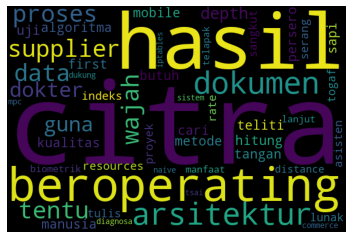

In [26]:
# Menampilkan hasil word cloud topik 1
draw_word_cloud(0)

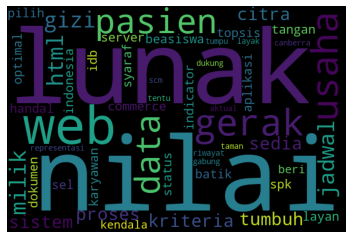

In [27]:
# Menampilkan hasil word cloud topik 2
draw_word_cloud(1)